In [30]:
import numpy as np
import matplotlib.pyplot as plt


import scipy as sp

In [31]:
dat=np.loadtxt("data/spatial_L20_T200.dat")
datF=np.loadtxt("data/fourier_L20_T200.dat")

In [32]:
listt=np.arange(40)
listx=np.arange(100)

In [33]:
L=20
tmax=200
alat=2.0*np.pi/L

In [34]:
xx=np.mod( dat.T[1]+L/2, L ) - L/2

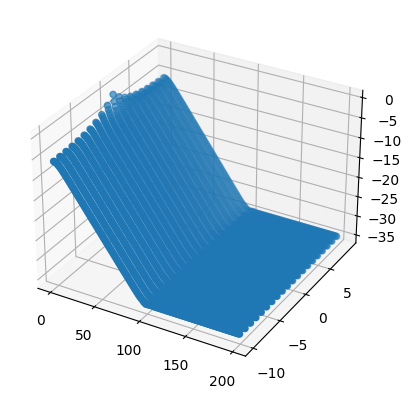

In [35]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter( dat.T[0], xx, np.log(dat.T[2]))
# ax.set_zscale('log')

plt.show()

In [36]:
Z=np.array(np.split(dat.T[2], tmax))
T=np.array(np.split(dat.T[0], tmax))

# tmp=np.mod( dat.T[1]+50, 100)-50
# X=np.array(np.split(tmp, tmax))
X=np.array(np.split(dat.T[1], tmax))

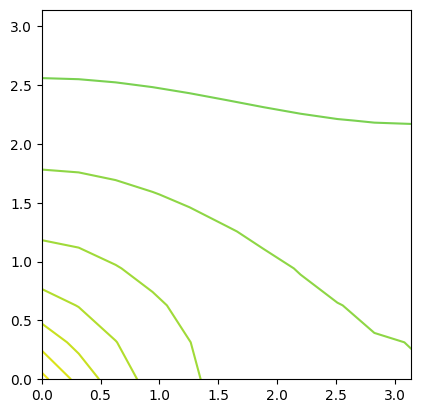

In [37]:
plt.contour( X*alat, T*alat, np.log(Z), 40 )
plt.gca().set_aspect('equal')

plt.xlim(0,L/2*alat)
plt.ylim(0,L/2*alat)

plt.savefig("contourL20.pdf")

plt.show()

(-12.0, 0.0)

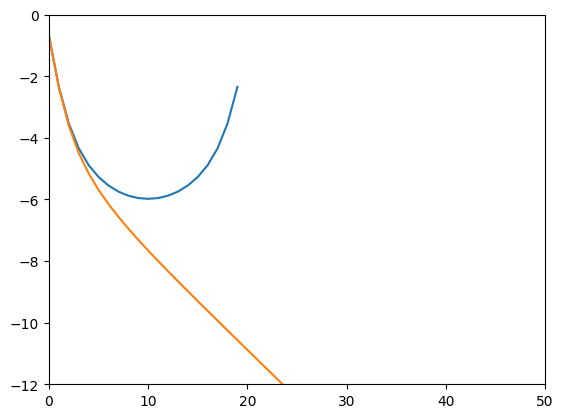

In [39]:
plt.plot(np.log(Z)[0])
plt.plot(np.log(Z.T)[0])

plt.xlim(0,50)
plt.ylim(-12,0)

In [40]:
nmin=1
nmax=4
cut_in_t=dat[L*nmin:L*nmax]
separated=np.array(np.split(cut_in_t, nmax-nmin))
retrieved=separated[:,nmin:nmax]
tofit=np.array(np.split(retrieved.flatten(), (nmax-nmin)**2))

In [41]:
tofit_scaled=np.array([ tofit.T[0]*alat, tofit.T[1]*alat, tofit.T[2] ]).T

In [42]:
def fitter( A, Delta, t, x ):
    return A/(t**2+x**2)**Delta

In [43]:
def f( pars ):
    A=pars[0]
    Delta=pars[1]
    res=0.0
    for i in range(tofit.shape[0]):
        pt=tofit[i]
        diff=fitter( A, Delta, pt[0], pt[1] ) - pt[2]
        res+=(diff*100)**2
    return res

In [44]:
fitres=sp.optimize.minimize( f, [0.06, 0.83], method='powell')
A0, Delta0 = fitres['x']
fitres

   direc: array([[2.15000930e-05, 3.78328742e-04],
       [1.15904466e-05, 2.81786896e-04]])
     fun: 0.0397423002467898
 message: 'Optimization terminated successfully.'
    nfev: 280
     nit: 10
  status: 0
 success: True
       x: array([0.0674962, 0.8391887])

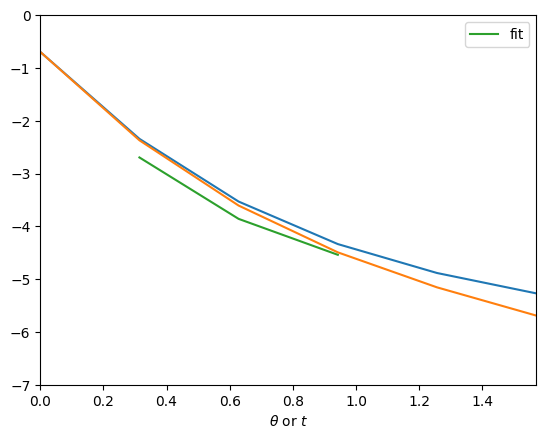

In [46]:
plt.plot( np.arange(L)*alat, np.log(Z)[0] )
plt.plot( np.arange(tmax)*alat, np.log(Z.T)[0])

plt.plot( np.arange(nmin,nmax)*alat, np.log( fitter(A0, Delta0, np.arange(nmin,nmax), 0.0 ) ), label="fit" )

# plt.xlim(0,50)
# plt.ylim(-12,0)
plt.xlim(0, np.pi/2)
plt.ylim(-7,0)

plt.xlabel("$\\theta$ or $t$")

plt.savefig("fitcontourL20.pdf")

plt.legend()

In [47]:
Z=np.array(np.split(datF.T[2], tmax))
T=np.array(np.split(datF.T[0], tmax))
X=np.array(np.split(datF.T[1], tmax))

In [48]:
tofit=np.array([ T.T[0], Z.T[0] ]).T

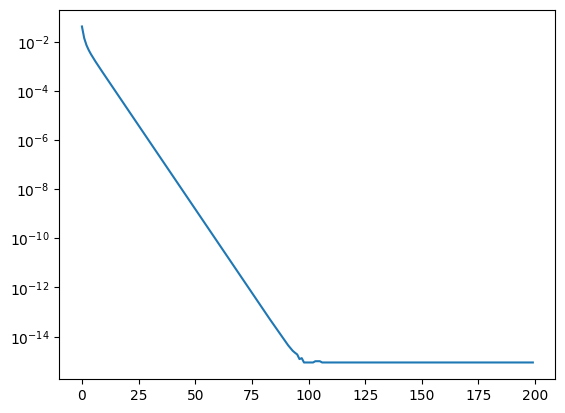

In [49]:
plt.plot(tofit.T[0], tofit.T[1])
plt.yscale("log")

In [50]:
fitm=7
fitM=18

In [51]:
def fitter( A, Delta, t ):
    return A*np.exp(-alat*Delta*t)

In [52]:
def f( pars ):
    A=pars[0]
    Delta=pars[1]
    res=0.0
    for i in range(fitm,fitM):
        pt=tofit[i]
        diff=fitter( A, Delta, pt[0] ) - pt[1]
        res+=(diff*1000)**2
    return res

In [53]:
fitres=sp.optimize.minimize( f, [1.0e-2, 1.0], method='powell' )
A0, Delta0 = fitres['x']
fitres

   direc: array([[-3.58277679e-08,  8.69496660e-06],
       [-1.50782877e-07,  4.20134239e-06]])
     fun: 1.0671426351533722e-05
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 2000
     nit: 73
  status: 1
 success: False
       x: array([0.01018962, 1.00686725])

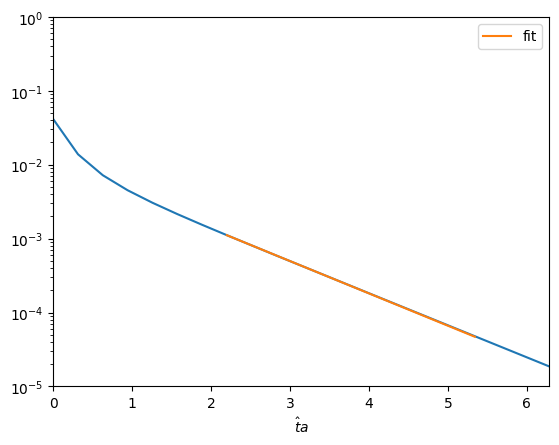

In [56]:
plt.plot( tofit.T[0]*alat, tofit.T[1])
plt.plot( np.arange(fitm, fitM)*alat, fitter( A0, Delta0, np.arange(fitm, fitM) ), label="fit")

plt.yscale("log")
plt.xlabel("$\\hat{t} a$")

plt.xlim(0, 2.0*np.pi)
plt.ylim(1.0e-5, 1.0e0)

plt.savefig("fitk0L20.pdf")

plt.legend()

In [57]:
k=1

In [58]:
tofit=np.array([ T.T[k], Z.T[k] ]).T

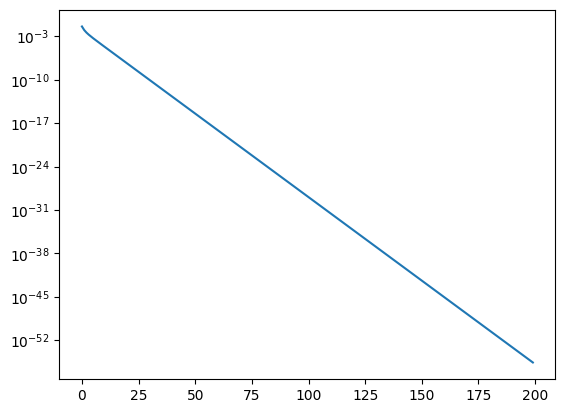

In [59]:
plt.plot(tofit.T[0], tofit.T[1])
plt.yscale("log")

In [60]:
fitm=7
fitM=18

In [61]:
def fitter( A, Delta, t ):
    return A*np.exp(-alat*Delta*t)

In [62]:
def f( pars ):
    A=pars[0]
    Delta=pars[1]
    res=0.0
    for i in range(fitm,fitM):
        pt=tofit[i]
        diff=fitter( A, Delta, pt[0] ) - pt[1]
        res+=(diff*100)**2
    return res

In [63]:
fitres=sp.optimize.minimize( f, [ 0.012, 2.], method='powell' )
A0, Delta0 = fitres['x']
fitres

   direc: array([[-2.22807168e-07, -2.26752736e-05],
       [ 3.71842566e-08, -1.13227107e-05]])
     fun: 2.5707420487611977e-10
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 2000
     nit: 72
  status: 1
 success: False
       x: array([0.00993467, 1.9848619 ])

In [64]:
tofit.shape

(200, 2)

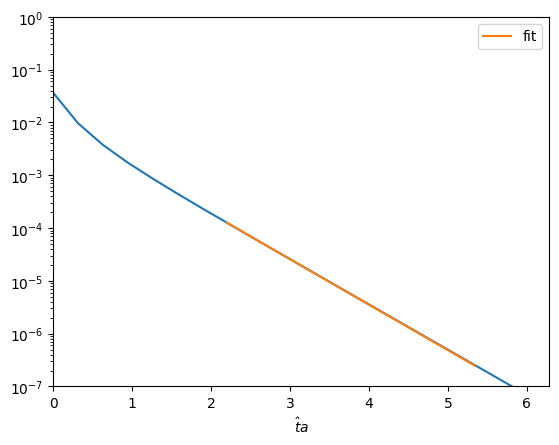

In [66]:
plt.plot( tofit.T[0]*alat, tofit.T[1])
plt.plot( np.arange(fitm, fitM)*alat, fitter( A0, Delta0, np.arange(fitm, fitM) ), label="fit")

plt.yscale("log")
plt.xlabel("$\\hat{t} a$")

plt.xlim(0, 2.0*np.pi)
plt.ylim(1.0e-7, 1.0)

plt.savefig("fitk1L20.pdf")

plt.legend()